In [2]:
import pandas as pd
import os
import pymongo as pm
import re
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_rows = 200

### Load in Data

I am loading the data from the csvs you gave me.

In [3]:
workbook_path = os.path.join('DFS', 'Resources', 'DraftKingsNoNotes.xlsx')
workbook = pd.ExcelFile(workbook_path)

vegas_dash = workbook.parse('Vegas Dash')
top_guns = workbook.parse('TOP GUNS')
wr_dash = workbook.parse('WR Dash')
te_dash = workbook.parse('TE Dash')
rb_dash = workbook.parse('RB Dash')
qb_dash = workbook.parse('QB Dash')
dst_dash = workbook.parse('DST Dash')

### Data Cleaning

here I drop some columns that cause null and unwanted columns

In [4]:
wr_dash = wr_dash.drop_duplicates().drop(columns=['JALG', 'WR', 'CB MU', 9.99])

In this cell:
* I seperate the names of the players and the columns you specified in the word document for the WR position. 
* drop any rows with null values on them
* * this might be caused by the player not having data avail for one of the providers, if you see any crucial players missing I'll adjust and see if it throws any exceptions

The next cell specifies how many players/rows are left in our data frame.

In [5]:
points_of_interest = wr_dash[['Name', 
                              'Air Targ L4', 
                              'Air AY L4', 
                              'Air WOPR L4', 
                              '4f4 RZ ', 
                              '4f4 FP L4']]
points_of_interest = points_of_interest.set_index('Name').dropna()

In [6]:
len(points_of_interest)

78

### The Data

In [7]:
points_of_interest

,Air Targ L4,Air AY L4,Air WOPR L4,4f4 RZ,4f4 FP L4
Name,,,,,
Michael Thomas,11.50,92.25,0.75,0.6,29.1
Julio Jones,9.50,97.50,0.70,0.6,18.1
Julian Edelman,10.00,105.00,0.62,0.3,23.1
Tyreek Hill,5.75,47.25,0.50,0.5,18.5
Kenny Golladay,6.00,91.50,0.44,0.4,18.5
Jarvis Landry,9.75,109.25,0.69,0.4,9.9
Keenan Allen,5.50,37.75,0.48,0.5,8.4
Tyler Boyd,8.00,79.75,0.56,0.4,14.4
Robert Woods,11.25,84.00,0.61,0.3,9.3


## Statistical summary of the Data

In [8]:
summary = points_of_interest.describe()
summary

,Air Targ L4,Air AY L4,Air WOPR L4,4f4 RZ,4f4 FP L4
count,78.000000,78.000000,78.000000,78.000000,78.000000
mean,4.778846,50.198718,0.374615,0.255128,9.543590
std,2.809995,33.452024,0.195738,0.178484,6.301053
min,0.500000,-1.750000,0.020000,0.000000,0.000000
25%,2.562500,21.187500,0.220000,0.100000,4.650000
50%,4.625000,44.000000,0.365000,0.200000,8.500000
75%,6.500000,73.937500,0.517500,0.400000,13.250000
max,11.500000,134.500000,0.750000,0.600000,29.100000


In [9]:
ay_targets = points_of_interest['Air Targ L4']
ay_yards = points_of_interest['Air AY L4']
ay_wopr = points_of_interest['Air WOPR L4']
_4rz = points_of_interest['4f4 RZ ']
_4fp = points_of_interest['4f4 FP L4']

# JALG

The next cell attempts to make the 'standard player' by applying your algorithm to the mean of each column. Then in the next cell I'm applying your algorithm to all of the players and plotting them in a histogram. If you're not familiar with histograms we can discuss further but for now [here](https://statistics.laerd.com/statistical-guides/understanding-histograms.php) is a good link I found that is short and sweet.

In [10]:
mean_weighted_player = ((.15 * summary.loc['mean', 'Air Targ L4']) + 
                        (.15 * summary.loc['mean', 'Air AY L4']) + 
                        (.05 * summary.loc['mean', 'Air WOPR L4']) + 
                        (.15 *  summary.loc['mean', '4f4 RZ ']) + 
                        (.5 * summary.loc['mean', '4f4 FP L4']))
mean_weighted_player

13.075429487179491

In [11]:
JALG = (.15 * summary.loc['mean', 'Air Targ L4']) + (.15 * summary.loc['mean', 'Air AY L4']) + (.05 * ay_wopr) + (.15 * _4rz) + (.5 * _4fp) 

One thing this plot makes obvious is that the mode of the data is ~ 11.

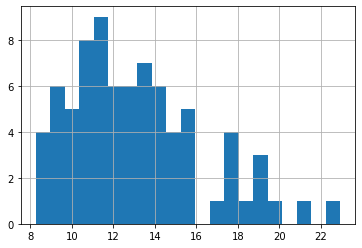

In [12]:
JALG.hist(bins=21)

I then thought to explore the distribution of each individual data point. I thought this may help understand how to weigh them. However the distributions weren't consistent, and one of the data points is sparse.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002620A470BC8>,
      dtype=object)

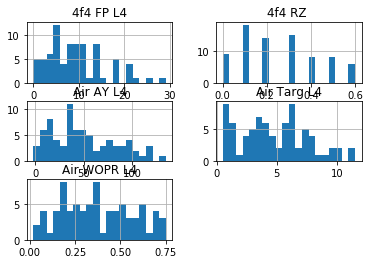

In [13]:
# fig, axes = plt.subplots(nrows=2, ncols=3)

# ay_targets.hist(bins=15, ax=axes[0,0])
# ay_yards.hist(bins=15,ax=axes[0,1])
# ay_wopr.hist(bins=15,ax=axes[0,2])
# _4rz.hist(bins=15,ax=axes[1,1])
# _4fp.hist(bins=15,ax=axes[1,2])
points_of_interest.hist(bins=20)

So then I decide to take the log of the data because sometimes this makes it easier to see a distribution. In this case I'm not sure this is really meaningful because the numbers were originally very small. I'll elaborate during our call. 

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = StandardScaler()
print(scaler.fit(points_of_interest))
minmaxscaler = MinMaxScaler()
print(minmaxscaler.fit(points_of_interest))

StandardScaler(copy=True, with_mean=True, with_std=True)
MinMaxScaler(copy=True, feature_range=(0, 1))


Here we arrive at the alleged solution! Standard Scaler is a mathematical transform that scales data around its mean and trails with the data's standard deviation. The line of code is simply `scaler.transform(points_of_interest)`
this applies the equation to all points.

In [16]:
standard_df = pd.DataFrame(
    scaler.transform(points_of_interest), 
    columns=['Air Targ L4', 
             'Air AY L4', 
             'Air WOPR L4', 
             '4f4 RZ ', 
             '4f4 FP L4'])
minmaxscaler_df = pd.DataFrame(
    minmaxscaler.transform(points_of_interest), 
    columns=['Air Targ L4', 
             'Air AY L4', 
             'Air WOPR L4', 
             '4f4 RZ ', 
             '4f4 FP L4'])

I originally plotted just the scaled data, and knew I was on the right track. So I decided to make a column that takes the average since they were all the histograms were centered around 0. Kind of like we wanted them to be centered around 1.  

In [17]:
standard_df['avg'] = (standard_df['Air Targ L4'] + 
                      standard_df['Air AY L4'] + 
                      standard_df['Air WOPR L4'] + 
                      standard_df['4f4 RZ '] + 
                      standard_df['4f4 FP L4']) / 6
standard_df['weighted_point'] = (( .15 * standard_df['Air Targ L4']) + 
                      ( .15 * standard_df['Air AY L4']) + 
                      ( .05 * standard_df['Air WOPR L4']) + 
                      ( .15 * standard_df['4f4 RZ ']) + 
                      ( .5 * standard_df['4f4 FP L4']))
standard_df['weighted_avg'] = (( .15 * standard_df['Air Targ L4']) + 
                      ( .15 * standard_df['Air AY L4']) + 
                      ( .05 * standard_df['Air WOPR L4']) + 
                      ( .15 * standard_df['4f4 RZ ']) + 
                      ( .5 * standard_df['4f4 FP L4'])) / 6


In [18]:
minmaxscaler_df['avg'] = (minmaxscaler_df['Air Targ L4'] + 
                      minmaxscaler_df['Air AY L4'] + 
                      minmaxscaler_df['Air WOPR L4'] + 
                      minmaxscaler_df['4f4 RZ '] + 
                      minmaxscaler_df['4f4 FP L4']) / 6
minmaxscaler_df['weighted_point'] = (( .15 * minmaxscaler_df['Air Targ L4']) + 
                      ( .15 * minmaxscaler_df['Air AY L4']) + 
                      ( .05 * minmaxscaler_df['Air WOPR L4']) + 
                      ( .15 * minmaxscaler_df['4f4 RZ ']) + 
                      ( .5 * minmaxscaler_df['4f4 FP L4']))
minmaxscaler_df['weighted_avg'] = (( .15 * minmaxscaler_df['Air Targ L4']) + 
                      ( .15 * minmaxscaler_df['Air AY L4']) + 
                      ( .05 * minmaxscaler_df['Air WOPR L4']) + 
                      ( .15 * minmaxscaler_df['4f4 RZ ']) + 
                      ( .5 * minmaxscaler_df['4f4 FP L4'])) / 6

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002620C615C88>,
      dtype=object)

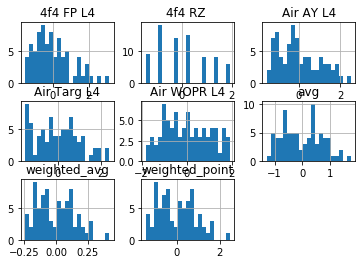

In [19]:
standard_df.hist(bins=21)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002620A750EC8>,
      dtype=object)

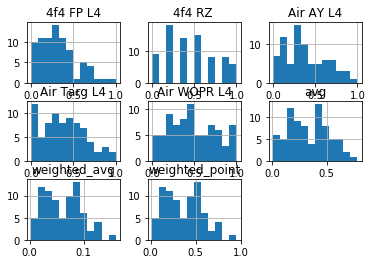

In [20]:
minmaxscaler_df.hist(bins=12)

Notice the almost normal distribution of the avg histogram. This is ideal for what you are trying to do. Scroll down to the bottom, I selected the max and min of the avg column to see if the data made sense to you. 

In [22]:
standard_df = standard_df.set_index(points_of_interest.index)

minmaxscaler_df = minmaxscaler_df.set_index(points_of_interest.index)
standard_df

,Air Targ L4,Air AY L4,Air WOPR L4,4f4 RZ,4f4 FP L4,avg,weighted_point,weighted_avg
Name,,,,,,,,
Michael Thomas,2.407355,1.265199,1.930201,1.944736,3.123762,1.778542,2.500985,0.416831
Julio Jones,1.691004,1.423156,1.673105,1.944736,1.366723,1.349787,1.525851,0.254308
Julian Edelman,1.870092,1.648809,1.261750,0.253033,2.165377,1.199843,1.711566,0.285261
Tyreek Hill,0.347844,-0.088718,0.644719,1.380835,1.430615,0.619216,0.993538,0.165590
Kenny Golladay,0.437388,1.242634,0.336203,0.816934,1.430615,0.710629,1.106661,0.184443
Jarvis Landry,1.780548,1.776679,1.621685,0.816934,0.056930,1.008796,0.765673,0.127612
Keenan Allen,0.258300,-0.374545,0.541880,1.380835,-0.182667,0.270634,0.125449,0.020908
Tyler Boyd,1.153740,0.889111,0.953235,0.816934,0.775719,0.764790,0.864489,0.144081
Robert Woods,2.317811,1.016981,1.210331,0.253033,-0.038909,0.793208,0.579236,0.096539


In [ ]:
standard_df[standard_df['avg'] == standard_df.avg.max()]

In [ ]:
standard_df[standard_df['avg'] == standard_df.avg.min()]

In [ ]:
minmaxscaler_df[minmaxscaler_df['avg'] == minmaxscaler_df.avg.max()]

In [ ]:
minmaxscaler_df[minmaxscaler_df['avg'] == minmaxscaler_df.avg.min()]

In [ ]:
minmaxscaler_df[minmaxscaler_df['weighted_avg'] == minmaxscaler_df.weighted_avg.min()]